# **QUESTION ONE**
1. data quality problems:

  The 'education', 'contact', and 'poutcome' contain a lot of NaN values that might cause the model to learn incorrectly. It may also lead to a faulty model with a the lack of data that could potentially be important.


2.  Exploratory data analysis (EDA)

  Majority of the features are skewed towards the right. The feature 'balance' has an ungodly amount of outliers there's literally no reason for that 😭


 3. Anomanly Detection:

The data features outliers (data points that don't fall under the normal range of the data), NaN values (missing or null values in the dataset), skewed data (data distribution is slightly biased to the earlier points), noise (data with more randomness) & overall ambiguous correlation (the most correlations is -0.89; other than that the data majorly falls around 0.5 correlation which is not significant).


4.  Summary

The code didn't run completely BUT as per the confusion matrix and the evaluation metrics, the model lacks accuracy, precision and recall (the FALSE POSITIVES are too high, and the TRUE POSITIVES are too low). Thus, using the entire dataset to train the model is not worth it. The 'duration' attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.
  


In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [3]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [4]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [5]:
# Step 2: Characterization
print("Characterization:")
print(X.describe())

Characterization:
                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%      

In [6]:
X_df = X

In [7]:
# Add the target variable as a column to the DataFrame
X_df['target'] = y

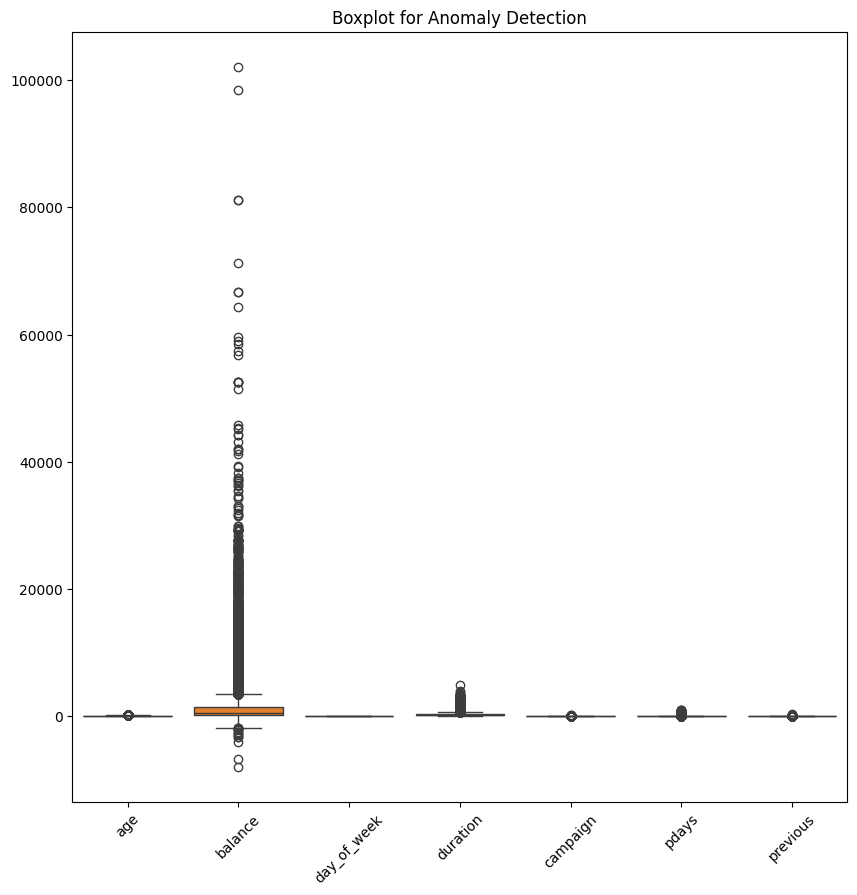

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anomaly detection
# Detecting anomalies using boxplots
plt.figure(figsize=(10, 10))
sns.boxplot(data=X_df.drop(columns='target'))
plt.title('Boxplot for Anomaly Detection')
plt.xticks(rotation=45)
plt.show()

In [9]:
# feature 'balance' has many anomalies (the data points exceed the boundary of the boxplot's box)
# feature 'duration' also has many anomalies, but not as many as 'balance'

---

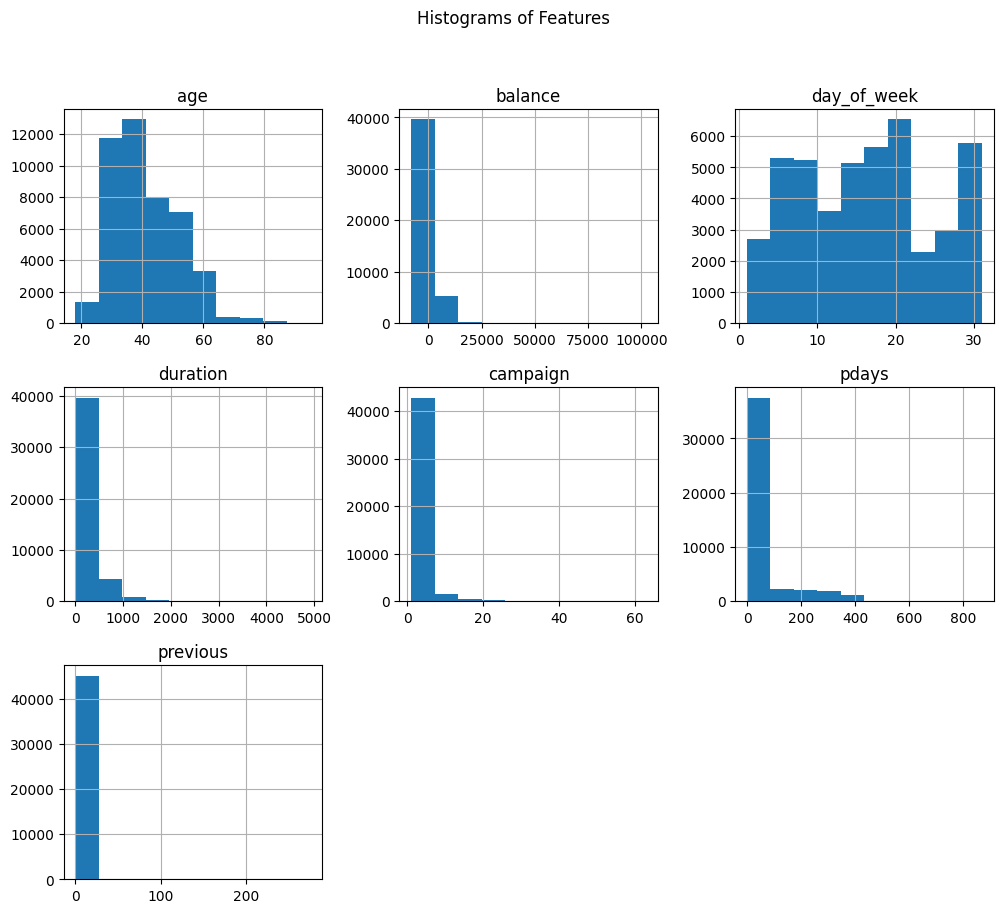

In [10]:
# 2. Data Visualization
# Histograms
X_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features')
plt.show()

In [11]:
# age, balance, duration, campaign and pdays are skewed towards right
# day_of_the_week is evenly distributed

---

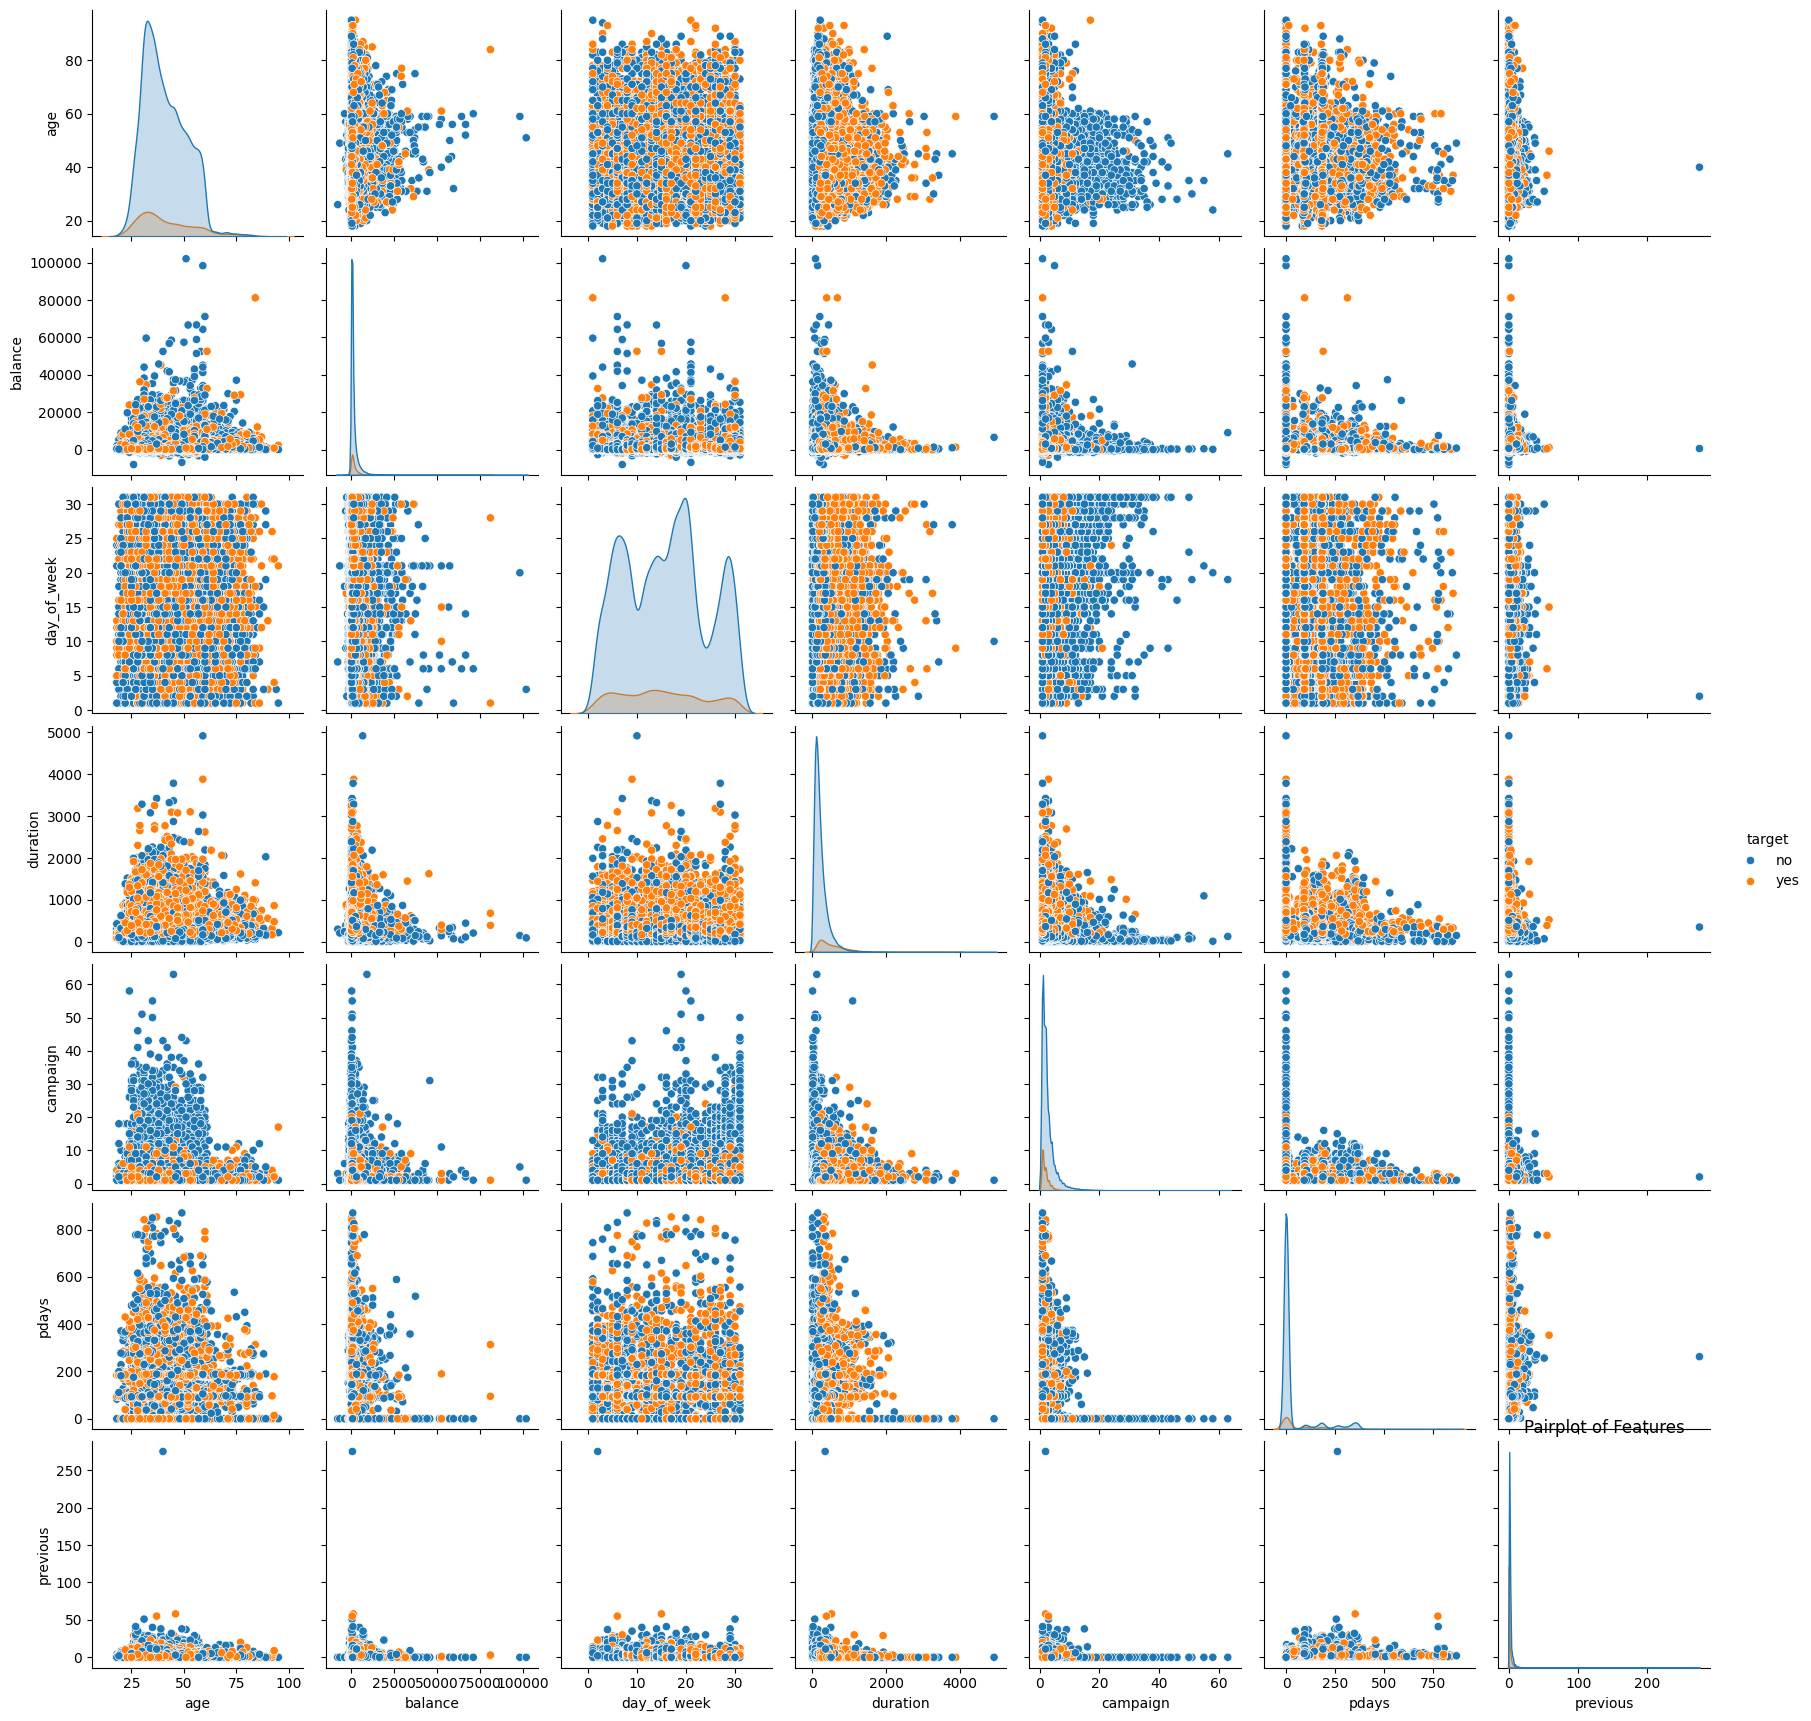

In [12]:
# Scatter plots
sns.pairplot(data=X_df, hue='target')
plt.title('Pairplot of Features')
plt.show()

---

In [13]:
print(X_df.isna().sum())

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
target             0
dtype: int64


In [14]:
# dealing with job NaN

In [15]:
rslt_df = X_df[['age','job']].loc[X_df['job'].isna()==True]
rslt_df

,age,job
4,33,NaN
216,47,NaN
354,59,NaN
876,37,NaN
1072,29,NaN
...,...,...
44714,45,NaN
44742,64,NaN
44970,28,NaN
45141,77,NaN


In [16]:
X_df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [17]:
X_df.loc[X_df['age'] >= 60, 'job'] = X_df.loc[X_df['age'] >= 60, 'job'].fillna('retired')

In [18]:
X_df.loc[X_df['age'] <= 18, 'job'] = X_df.loc[X_df['age'] <= 18, 'job'].fillna('student')

In [19]:
X_df['job'] = X_df['job'].fillna('blue-collar')

In [20]:
# dealing with education NaN

In [21]:
X_df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [22]:
print(X_df[['education', 'age']])

       education  age
0       tertiary   58
1      secondary   44
2      secondary   33
3            NaN   47
4            NaN   33
...          ...  ...
45206   tertiary   51
45207    primary   71
45208  secondary   72
45209  secondary   57
45210  secondary   37

[45211 rows x 2 columns]


In [23]:
X_df.loc[X_df['age'] <= 14, 'education'] = X_df.loc[X_df['age'] <= 14, 'education'].fillna('primary')

In [24]:
X_df.loc[X_df['age'] <= 18, 'education'] = X_df.loc[X_df['age'] <= 18, 'education'].fillna('secondary')

In [25]:
X_df['education'] = X_df['education'].fillna('tertiary')

In [26]:
# dealing with contact NaN & poutcome NaN

In [27]:
X_df['contact'].value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

In [28]:
X_df['contact'] = X_df['contact'].fillna('cellular')

In [29]:
X_df['poutcome'].value_counts()

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

In [30]:
X_df['poutcome'] = X_df['poutcome'].fillna('failure')

---

In [31]:
# converting categorical to encoded numerical variables

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_df['target'] = label_encoder.fit_transform(X_df['target'])

In [33]:
X_df['job'] = label_encoder.fit_transform(X_df['job'])

In [34]:
X_df['marital'] = label_encoder.fit_transform(X_df['marital'])

In [35]:
X_df['education'] = label_encoder.fit_transform(X_df['education'])

In [36]:
X_df['default'] = label_encoder.fit_transform(X_df['default'])

In [37]:
X_df['housing'] = label_encoder.fit_transform(X_df['housing'])

In [38]:
X_df['loan'] = label_encoder.fit_transform(X_df['loan'])

In [39]:
X_df['contact'] = label_encoder.fit_transform(X_df['contact'])

In [40]:
X_df['month'] = label_encoder.fit_transform(X_df['month'])

In [41]:
X_df['poutcome'] = label_encoder.fit_transform(X_df['poutcome'])

In [42]:
X_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,1,1,2,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,1,2,2,0,1,0,0,0,5,8,198,1,-1,0,0,0
5,35,4,1,2,0,231,1,0,0,5,8,139,1,-1,0,0,0
6,28,4,2,2,0,447,1,1,0,5,8,217,1,-1,0,0,0
7,42,2,0,2,1,2,1,0,0,5,8,380,1,-1,0,0,0
8,58,5,1,0,0,121,1,0,0,5,8,50,1,-1,0,0,0
9,43,9,2,1,0,593,1,0,0,5,8,55,1,-1,0,0,0


In [43]:
print(X_df.columns[:-2])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous'],
      dtype='object')


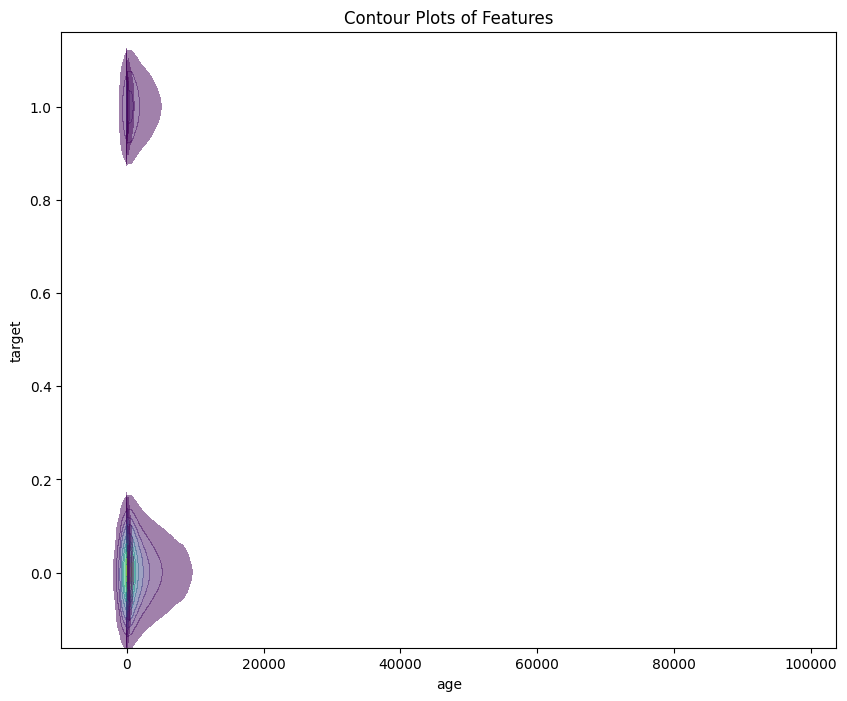

In [44]:
# Contour plots
plt.figure(figsize=(10, 8))
for feature in X_df.columns[:-2]:
    sns.kdeplot(data=X_df, x=feature, y='target', fill=True, cmap='viridis', alpha=0.5)
plt.title('Contour Plots of Features')
plt.show()


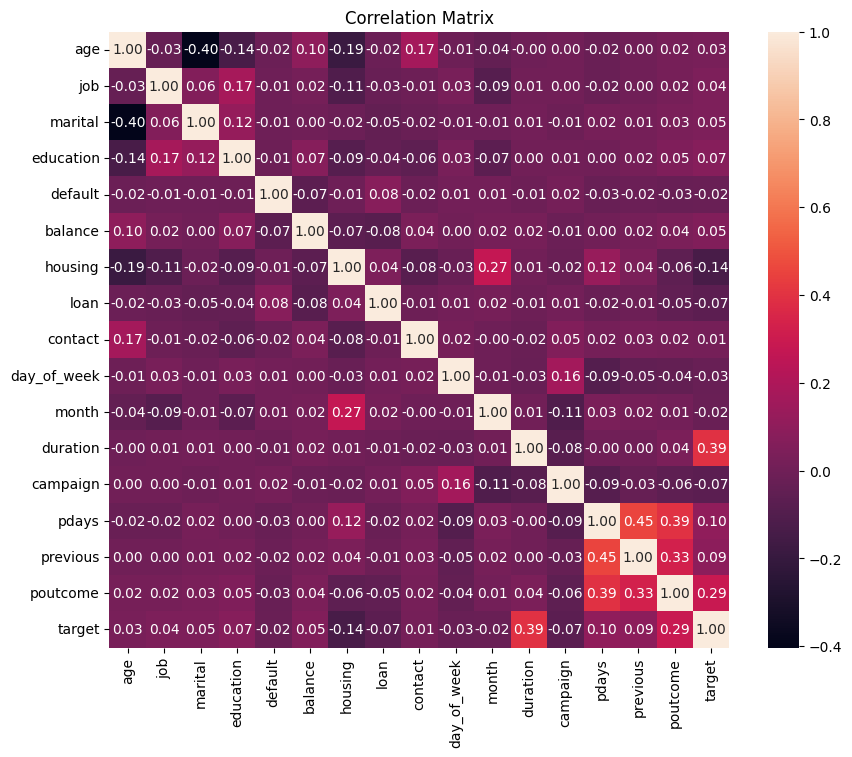

In [52]:
# Matrix plots
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Step 3: Classification
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
import numpy as np

In [49]:
class NearestNeighborClassifierManual:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        #To Do
        return np.array(predictions)

In [54]:
# Import GaussianNaiveBayesClassifierManual
class GaussianNaiveBayesClassifierManual:
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None

    def fit(self, X_train, y_train):
        self.class_priors = {}
        self.class_means = {}
        self.class_variances = {}
        classes = np.unique(y_train)
        for class_ in classes:
            X_class = X_train[y_train == class_]
            self.class_priors[class_] = len(X_class) / len(X_train)
            self.class_means[class_] = np.mean(X_class, axis=0)
            self.class_variances[class_] = np.var(X_class, axis=0)

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
          posteriors=[]
          for class_ in self.class_priors:
            prior=self.class_priors[class_]
            mean=self.class_means[class_]
            var=self.class_variances[class_]
            liklihood = np.prod(1.0 / np.sqrt(2.0 * np.pi * var) * np.exp(-1 * (x_test - mean)**2 / (2.0 * var)))
            thispoint=prior*liklihood
            posteriors.append(thispoint)
          PClass=np.argmax(posteriors)
          predictions.append(PClass)
        #To Do
        return np.array(predictions)

# MemoryError: Unable to allocate 9.75 GiB for an array with shape (36168, 36168) and data type float64

In [55]:
class SupportVectorMachineClassifierManual:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
          for i, x in enumerate(X_train):
            if y_train[i]*(np.dot(x, self.weights)-self.bias)>=1:
              self.weights-=self.learning_rate*(2*1/self.epochs*self.weights)
            else:
               self.weights -= self.learning_rate * (2 * 1 / self.epochs * self.weights - np.dot(x, y_train[i]))
               self.bias-=self.learning_rate*y_train[i]

    def predict(self, X_test):
        predictions=np.sign(np.dot(X_test, self.weights)-self.bias)
        return predictions.astype(int)

In [56]:
class ConfusionMatrix:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.n_classes = len(np.unique(y_true))
        self.matrix = self._compute_confusion_matrix()

    def _compute_confusion_matrix(self):
        confusion_matrix = np.zeros((self.n_classes, self.n_classes), dtype=int)
        for T, P in zip(self.y_true, self.y_pred):
            confusion_matrix[T][P]+=2
        return confusion_matrix

    def plot(self):
        plt.figure(figsize=(8, 6))
        sns.heatmap(self.matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.arange(self.n_classes), yticklabels=np.arange(self.n_classes))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

In [57]:
class EvaluationMetrics:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.confusion_matrix = ConfusionMatrix(y_true, y_pred)
        self.metrics = self._compute_metrics()

    def _compute_metrics(self):
        tp = np.diag(self.confusion_matrix.matrix)
        fp = np.sum(self.confusion_matrix.matrix, axis=0)-tp
        fn = np.sum(self.confusion_matrix.matrix, axis=1)-tp
        tn = np.sum(self.confusion_matrix.matrix)-(tp+fp+fn)
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2 * (precision * recall) / (precision + recall) # math kr ke thak gya

        return {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'FPR': fpr,
            'FNR': fnr,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score
        }

In [ ]:
#Write a main to test all the above functions

In [59]:
from sklearn.gaussian_process import GaussianProcessClassifier

[]
[1 1 1 ... 1 1 1]


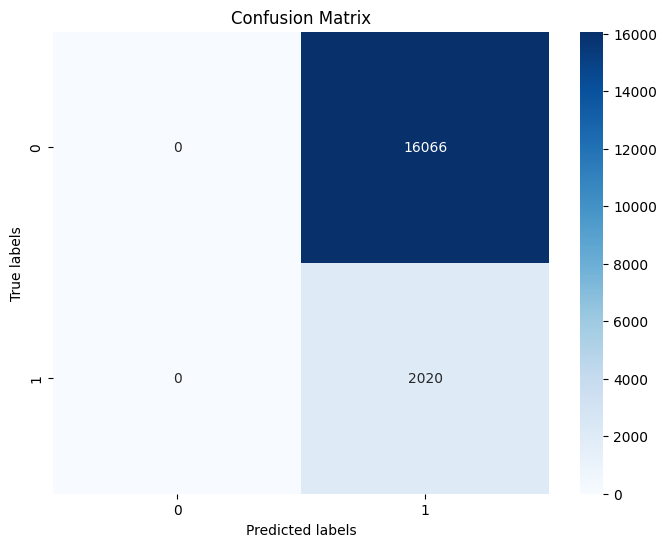

<ipython-input-57-bc2487307c39>:17: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)


Sensitivity:[0. 1.]
Specificity:[1. 0.]
FPR:[0. 1.]
FNR:[1. 0.]
Precision:[      nan 0.1116886]
Recall:[0. 1.]
F1 Score:[       nan 0.20093504]


In [ ]:

if __name__=="__main__":

    X_train, X_test, y_train, y_test = train_test_split(X_df.drop(columns=['target']), X_df['target'], test_size=0.2, random_state=42)
    Xtrainnp = X_train.values
    Ytrainnp = y_train.values
    Xtestnp = X_test.values
    NNclf = NearestNeighborClassifierManual()


    NNclf.fit(Xtrainnp, Ytrainnp)
    Xtestnp=Xtestnp.astype(int)
    predictions = NNclf.predict(Xtestnp)
    print(predictions)




    SVMclf=SupportVectorMachineClassifierManual()
    SVMclf.fit(Xtrainnp, Ytrainnp)
    predictions = SVMclf.predict(Xtestnp)
    print(predictions)


    Ytrainnp=np.array(y_train)
    cfm=ConfusionMatrix(Ytrainnp, predictions)
    cfm.plot()

    Eva02=EvaluationMetrics(Ytrainnp, predictions)
    metrics=Eva02.metrics
    for key, value in metrics.items():
        print(f"{key}:{value}")


    Gclf=GaussianProcessClassifier()
    Gclf.fit(Xtrainnp, Ytrainnp)
    predictions = Gclf.predict(Xtestnp)
    print(predictions)

